3.3 Build your own Machine Learning Model

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

Here we are specifing the file path to the Bitcoin price dataset (BTC-USD.csv) where it contains historical Bitcoin price data with various columns such as date, open, high, low, close, volume, etc.

In [5]:
#Bitcoin price dataset
file_path='BTC-USD.csv' 
data = pd.read_csv(file_path)

Converting the 'Date' column from string format to datetime format,this ensures that the 'Date' column is properly recognized as a datetime object, allowing for time-based operations where we are sorting the DataFrame 'data' by the 'Date' column in ascending order (oldest to newest) and sorting ensures that the dataset is arranged chronologically, which is important for time series analysis and model training.

In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')
print(data)


           Date          Open          High           Low         Close  \
0    2014-09-17    465.864014    468.174011    452.421997    457.334015   
1    2014-09-18    456.859985    456.859985    413.104004    424.440002   
2    2014-09-19    424.102997    427.834991    384.532013    394.795990   
3    2014-09-20    394.673004    423.295990    389.882996    408.903992   
4    2014-09-21    408.084991    412.425995    393.181000    398.821014   
...         ...           ...           ...           ...           ...   
2708 2022-02-15  42586.464844  44667.218750  42491.035156  44575.203125   
2709 2022-02-16  44578.277344  44578.277344  43456.691406  43961.859375   
2710 2022-02-17  43937.070313  44132.972656  40249.371094  40538.011719   
2711 2022-02-18  40552.132813  40929.152344  39637.617188  40030.976563   
2712 2022-02-19  40022.132813  40246.027344  40010.867188  40126.429688   

         Adj Close       Volume  
0       457.334015     21056800  
1       424.440002     34483200

In [7]:
#Feature Engineering
#extracts the year component of the datetime value.
data['Year'] = data['Date'].dt.year
#extracts the month component of the datetime value.
data['Month'] = data['Date'].dt.month
#extractsthe day component of the datetime value.
data['Day'] = data['Date'].dt.day
#Creating a new column which shifts the close prices by 1 row to get the previous day close.
data['prev_Close'] = data['Close'].shift(1)
#Creating column that shifts the close prices by 2 rows to get the close from 2 days ago.
data['2prior_Close'] = data['Close'].shift(2)
#Creating a column that shifts the close prices by 3 rows to get the close from 3 days ago.
data['3prior_Close'] = data['Close'].shift(3)
#Calculating a 5-day moving average of the close prices.
data['avg5'] = data['Close'].mean()
#Calculating a 10-day moving average of the 'Close' prices
data['avg10'] = data['Close'].mean()
print(data)

           Date          Open          High           Low         Close  \
0    2014-09-17    465.864014    468.174011    452.421997    457.334015   
1    2014-09-18    456.859985    456.859985    413.104004    424.440002   
2    2014-09-19    424.102997    427.834991    384.532013    394.795990   
3    2014-09-20    394.673004    423.295990    389.882996    408.903992   
4    2014-09-21    408.084991    412.425995    393.181000    398.821014   
...         ...           ...           ...           ...           ...   
2708 2022-02-15  42586.464844  44667.218750  42491.035156  44575.203125   
2709 2022-02-16  44578.277344  44578.277344  43456.691406  43961.859375   
2710 2022-02-17  43937.070313  44132.972656  40249.371094  40538.011719   
2711 2022-02-18  40552.132813  40929.152344  39637.617188  40030.976563   
2712 2022-02-19  40022.132813  40246.027344  40010.867188  40126.429688   

         Adj Close       Volume  Year  Month  Day    prev_Close  2prior_Close  \
0       457.334015

In [8]:
#linear regerssion
## Drop all rows with missing values from the DataFrame 'data' to ensure clean data before model training.
data = data.dropna()
# Defining the list of feature columns to be used for training the model.
features = ['Open', 'High', 'Low', 'Volume', 'prev_Close', '2prior_Close', '3prior_Close', 'avg5', 'avg10']
X = data[features]
y = data['Close']
#Initializing the StandardScaler to scale the features before model training.
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42, shuffle=False)
#creating a linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
#calculating r-squared
r2 = r2_score(y_test, y_pred)
#calculating the mean 
mae = mean_absolute_error(y_test, y_pred)
print("R-Squared=",r2)
print("Mean average Error=",mae)

R-Squared= 0.9980416390942779
Mean average Error= 488.27525722339925


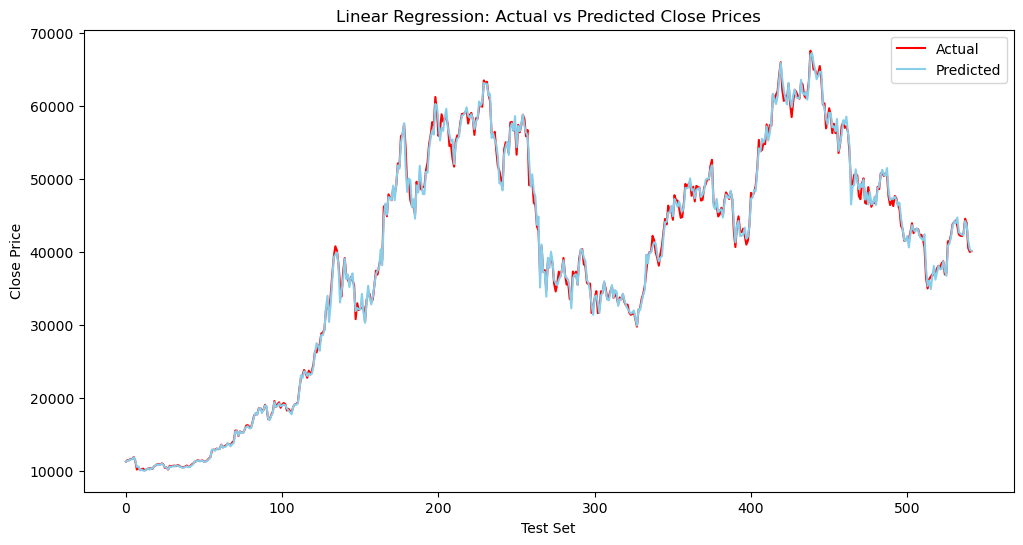

In [9]:
#plotting the lineaqr regression
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", color='red')
plt.plot(y_pred, label="Predicted", color='skyblue')
plt.title("Linear Regression: Actual vs Predicted Close Prices")
plt.xlabel("Test Set")
plt.ylabel("Close Price")
plt.legend()
plt.show()